<a href="https://colab.research.google.com/github/peiyulan/Text-Classification-in-Practice-From-Topic-Models-to-Transformers-/blob/main/Task1-LDA-News%20Classification/Task1_LDA_News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Text Classification: Topic Modeling LDA​**


## Overview

We will learn the about the most widely used text classification model LDA through:

An introduction to what and how does LDA model work?

Implementation of LDA model wiht Python:
- Activity 1: Text representation
- Activity 2: Training LDA model

Analysising your results
- Activity 3: Visualisation of text classification



---



# **Overview of Latent Dirichlet Allocation (LDA)**

![LDA.jpg](https://media.springernature.com/full/springer-static/image/chp%3A10.1007%2F978-981-19-3035-5_29/MediaObjects/520032_1_En_29_Fig3_HTML.png?as=webp)

# **Implementation of LDA**
---
### Steps
- Loading data and visualise data
- Prepare data for LDA analysis
- Training LDA model
- Analysing LDA model results

---

### Dataset
> The datasets we will use today:

BBC News Datasets (D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006. [PDF].)

The dataset was retrieved from BBC News, and has been widely used in machine-learning and traing text-classification models.
These datasets are made available for non-commercial and research purposes only.

The dataset contains 2225 news articles published between 2004-2005 on the BBC news website. Each article is labeled with one of the five topics: Politics, Business, Technology, Entertainment and Sport.


Source of dataset:
https://huggingface.co/datasets/SetFit/bbc-news

CNN-DailyMail News Text Summarization
The CNN / DailyMail Dataset is an English-language dataset containing just over 300k unique news articles as written by journalists at CNN and the Daily Mail. The current version supports both extractive and abstractive summarization, though the original version was created for machine reading and comprehension and abstractive question answering.

Source of dataset:
https://www.kaggle.com/datasets/gowrishankarp/newspaper-text-summarization-cnn-dailymail?resource=download



---



# Loading Python library and datasets

In [ ]:
# ============================
# Import Python libriary
# ============================

!pip install gensim
!pip install pyLDAvis
!pip install nltk

import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
import zipfile


In [ ]:
# ============================
# Download datasets
# ============================

# Open the zip file
!wget https://github.com/DCS-training/Text-Calssification-in-Practice-From-Topic-Models-to-Transformers/raw/refs/heads/main/Task1-LDA-News%20Classification/LDA_data.zip
!unzip /content/LDA_data.zip


## Load dataset to python

In [ ]:
import pandas as pd
import os

# Read the CSV file into a pandas DataFrame
file1 = "cnnnews_data.csv"
file2 = "BBCnews_data.csv"

data = pd.read_csv(file1)   # Feel free to change it to file2 and play with different dataset
data = data[:2200]          # We pick the first 2200 articles in the dataset for faster results

# Print name of each column and numer of data points
print(data.info(verbose=True), "\n")

In [ ]:
# Print the first 5 rows in the dataset
print(">>> The first 5 rows in the dataset")
print(data.head())

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Randomly select 100 articles and join them together (for faster processing)
long_string = ','.join(list(data['article'].sample(100).values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()



---



# Prepare data for LDA analysis

Before we can use the LDA model, data needs to be processed and transformed in a format that can be use as an input for LAD model, these steps inclues:

1. Tokenize the text
2. Remove stopwords
3. Convert the tokenized object into a corpus and dictionary

## 01 - Tokenization

Tokenisers work by splitting text into smaller components, or the unit for analysis.

For example, an article can be split into sentences, or words, depending on the purpose of your analysis.

This is usually done by identifyin the "separator"  or "delimiter" in the data.

For example, the " "(blank space) between words in a sentence, or the ","(comma) or "." (period)

In [ ]:
# ============================
# Practice tokenization
# ============================

from nltk.tokenize import sent_tokenize, word_tokenize

text = "This is an example sentence. It has five words."#example_sentence
print("Use sent_tokenize to split data into sentences")
print(sent_tokenize(text)) # nltk.tokenize.sent_tokenize(text, language='english')

print("\nUse word_tokenize to split data into sentences")
print(word_tokenize(text))


In [ ]:
# Note that tokenisation is similart but different from .splited list

print(word_tokenize(text))
print(text.split(" "))

In our case, as we are not interested in analysing punctuation, we will first remove punctuation marks and choose " " as the diameter to tokenise or data.

In [ ]:
# ============================
# Remove punctuation
# ============================

# Load the Regex (regular expression) library to clean up the data
import re

# Remove punctuation
article = data['article']
cleaned_article = article.map(lambda x: re.sub('[,\'\.!?]', '', x)) # Search for each row of data, and replace "[,\.!?]", with "" (nothing)
cleaned_article = cleaned_article.map(lambda x: x.lower()) # Make everything letter lower-case.

In [ ]:
# Compare results

print("Original article:")
print(article[0], "\n")
print("Article after removing punctuation and lower-case:")
print(cleaned_article[0])

Now let's use the method above to tokenise the dataset "news["cleaned_article"]"

In [ ]:
# ============================
# Tokenize the dataset
# ============================

tokenised_articles = [word_tokenize(article) for article in cleaned_article]

In [ ]:
# print the first tokenised article in the dataset

print(tokenised_articles[0])

## 02- Remove stopwords

Stop words are commonly used words. In English, for example, "the" , "is", "what", are all stopwords.

As these words do not carry much information of meaning in a sentence, they are usually excluded from the data to achieve a better analysis result.

In [ ]:
# ============================
# Remove stopwords
# ============================

import gensim    # open source Python library for text processing
from gensim.utils import simple_preprocess
import nltk      # natual language processing tool kit
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
customised_stopwords = ['from', 'mr', 'use'] # You can add your own stopwords
stop_words.extend(customised_stopwords)

# function for removing stop words
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

tokenised_articles_no_stopwords = remove_stopwords(tokenised_articles)

In [ ]:
# Compare results

print("The length of \nthe article: {}\ntokenised article: {}\nwithout stopwords: {}\n".format(len(cleaned_article[0].split()),len(tokenised_articles[0]), len(tokenised_articles_no_stopwords[0])))

print(cleaned_article[0].split(), "\n") # Original article
print(tokenised_articles[0], "\n") # Tokenised article
print(tokenised_articles_no_stopwords[0], "\n") # Tokenised article without stopwords

## 03- Text representation: Bag of words (BOW)

The last step of text processing is turning textual data into numerical format. In our case, we want to turn a news article into a series of numbers that represent the article.

One of the most common way to do this is "bag-of-words" or BOW.

It works by creating a vocabulary of all unique words in a collection of documents and then representing each document as a vector of word counts.

For example:
- Tokens: {banana, apple, walk, on, the, street, dog}
- Sentence 1 vector: {banana: 2, apple: 1, walk: 1, on: 1, the: 1, street: 1, dog: 1}
- Sentence 2 vector: {banana: 1, apple: 0, walk: 1, on: 1, the: 2, street: 1, dog: 0}


This represenation ignore the order and grammatical relationship between words, and simply count the number of appearance (frequency) of a given word in the text. It is commonly used in text classification or compare similarity between documents.

In general, this model works better on longer

In [ ]:
# ============================
# Create a dictionary of tokens
# ============================

import gensim.corpora as corpora

# This assign an index to each token (word)
id2word = corpora.Dictionary(tokenised_articles_no_stopwords)

for index in id2word.keys()[:10]:
    print(index, id2word[index])

In [ ]:
# ============================
# Create a corpus (numerical representation of documents, in our case, bag of words)
# ============================

# turn each article into "Bag of words"
corpus = [id2word.doc2bow(document) for document in tokenised_articles_no_stopwords]

# Compare results
print("article 2\n")
print(article[2])
print(corpus[2], "\n")
print(id2word[corpus[2][0][0]], "appears", corpus[2][0][1], "times")
print(id2word[corpus[2][1][0]], "appears", corpus[2][1][1], "times")




---



## 03 Train LDA model

Documentation of the gensim LDA model: https://radimrehurek.com/gensim/models/ldamodel.html

Let's try the most basic function using LdaMulticore

In [ ]:
# ============================
# Train LDA model
# ============================

from pprint import pprint

# number of topics, defined by the user. (ref. Hierarchical Dirichlet Process (HDP) that determines # of topic dynamically.)
num_topics = 8

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)


In [ ]:
# Print the keyword for each of the 5 topics

pprint(lda_model.print_topics())

In [ ]:
# ============================
# Visualise the results
# ============================

import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis


# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word, sort_topics = False)
LDAvis_prepared

## 04 Analyse and interpret the results

In [ ]:
# ============================
# Filter extreme words (frequency)
# ============================
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

id2word = corpora.Dictionary(tokenised_articles_no_stopwords)
id2word.filter_extremes(
    no_below=5,    # Keep tokens which are in at least 5 documents
    no_above=0.4,  # Keep tokens which are in no more than 50% of the documents (fraction)
    keep_n=20000   # Keep only the first 10,000 most frequent tokens (optional, for memory control)
)
corpus = [id2word.doc2bow(document) for document in tokenised_articles_no_stopwords]





In [ ]:
from pprint import pprint

num_topics = 6 #

# Build LDA model
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics= num_topics,
                                           random_state=100,     # generate same results everytime
                                           passes=15,
                                           iterations=100,
                                           per_word_topics=True) # calculate the most likely topic of each word


In [ ]:
# ============================
# Visualise the results
# ============================

# Print the Keyword in each topic
pprint(lda_model.print_topics())

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word,  sort_topics = False) # turn off sorting topic by size
LDAvis_prepared

Each documents can have several topics:

In [ ]:
print("Topic distrubution in document 0\n")

for idx, prop in enumerate(lda_model[corpus[0]][0]):
  print("propability of topic {} is: {}".format(idx+1, prop[1]))

In [ ]:
def format_topics_sentences(model=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()
    topic = []
    prop= []
    keywords = []

    # Get main topic in each document
    for i, row_list in enumerate(model[corpus]):
        row = row_list[0] if model.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)

        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = model.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                topic.append(int(topic_num))
                prop.append(round(prop_topic,4))
                keywords.append(topic_keywords)
            else:
                break
    sent_topics_df['Dominant_Topic'] = topic
    sent_topics_df['Perc_Contribution'] =prop
    sent_topics_df['Topic_Keywords']=keywords
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(model=lda_model, corpus=corpus, texts=tokenised_articles_no_stopwords)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']


In [ ]:
df_dominant_topic[520:533]

In [ ]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors


def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 15):
    # select the words in the documents
    corp = corpus[start:end]
    # generate color code
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1]
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]

            # Draw doc id
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1,
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart(lda_model=lda_model, corpus=corpus, start = 520, end = 533)

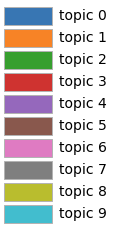



---



In [ ]:
import math

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=2, sort_colors=False):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7
        txt = "topic {}".format(i)
        ax.text(text_pos_x, y, txt , fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig


#plot_colortable(mcolors.TABLEAU_COLORS, ncols=1, sort_colors=False)

# Reflection

> What are the assumptions of LDA text classification?

# **Resources List**

**Tutorials**
Different ways to visualise results of LDA analysis:https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

